<a href="https://colab.research.google.com/github/JudithPadron/Inteligencia-Artificial-JC/blob/main/Perceptr%C3%B3nCompleto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adaline multicapa Arrhythmia**

Implementación del algoritmo donde aprende dos clases (Normal, Ischemic).

*   Generando y graficando datos simulados para frecuencia cardíaca y el intervalo QT.
*   Entrena un Perceptrón y Adaline con estos datos para clasificar entre pacientes normales e isquémicos.
*   Representa las regiones de decisión y los errores por época del modelo de Perceptrón.

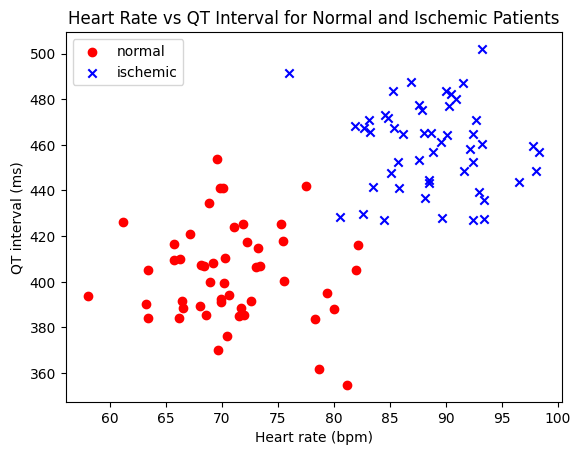

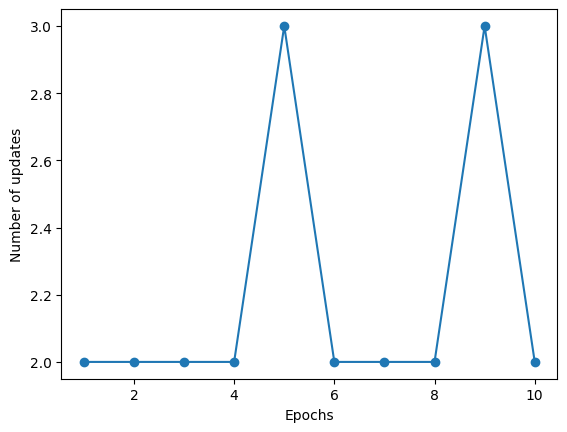

<ipython-input-5-79e50b7f9ae4>:218: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


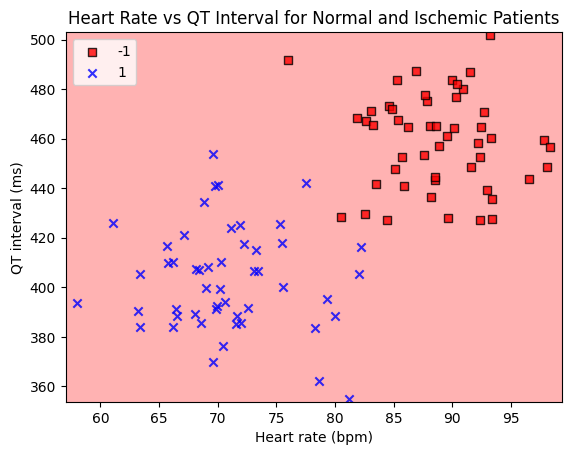

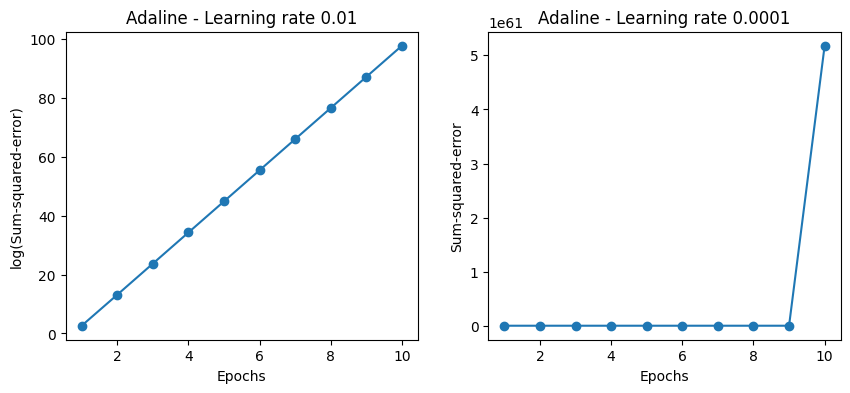

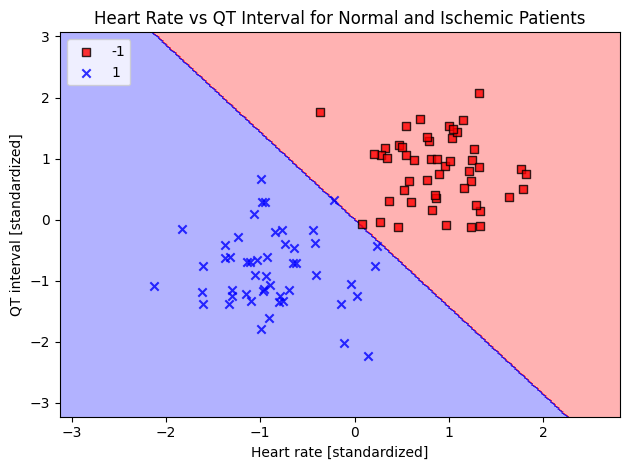

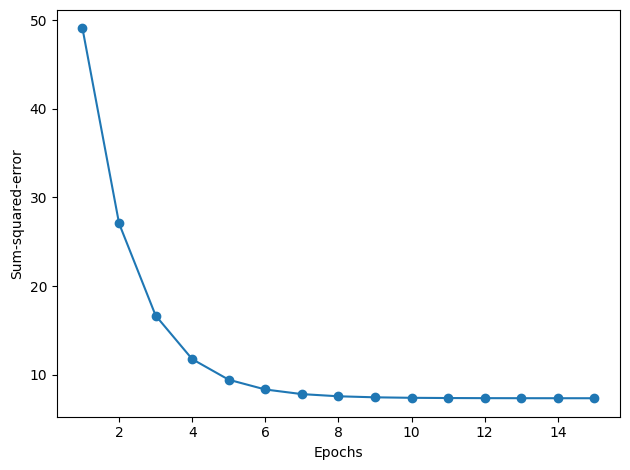

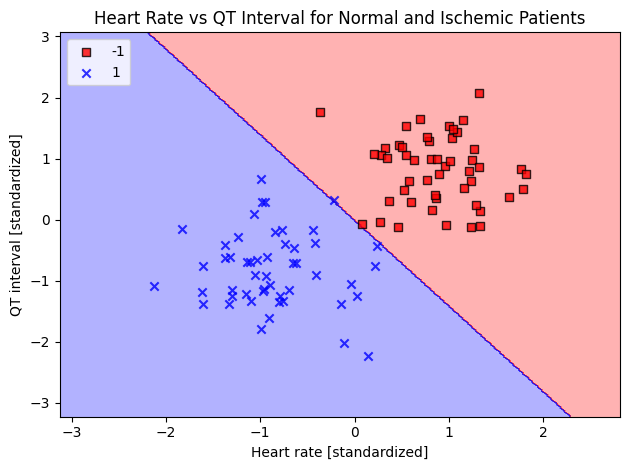

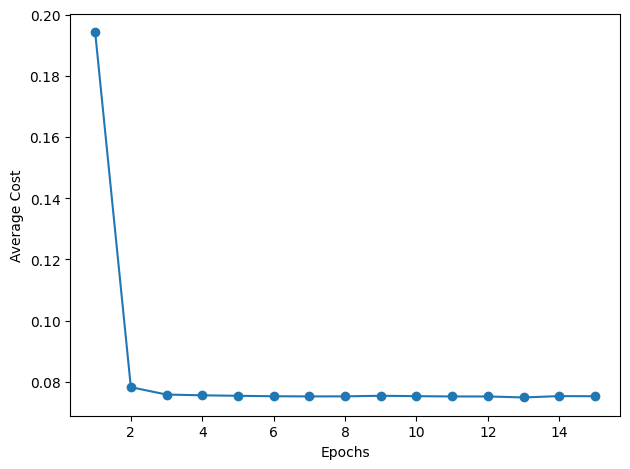

In [5]:
# codificación: utf-8
# *Aprendizaje automático con Python 2ª edición* de [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017
#
# Repositorio de código: https://github.com/rasbt/python-machine-learning-book-2nd-edition
#
# Licencia de código: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)
# # Aprendizaje cutomático con Python - Códigos de ejemplo
# # Capítulo 2 - Entrenar algoritmos simples de aprendizaje automático para clasificación
# Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).
# In[1]:

# *The use of `watermark` is optional. You can install this IPython extension via "`pip install watermark`". For more information, please see: https://github.com/rasbt/watermark.*

# ### Sumario
#

# - [Neuronas artificiales: un vistazo a los inicios del aprendizaje automático](#Neuronas-artificiales-un-vistazo-a-los-inicios-del-aprendizaje-automático)
#     - [La definición formal de una neurona artificial](#La-definición-formal-de-una-neurona-artificial)
#     - [La regla de aprendizaje del perceptrón](#La-regla-de-aprendizaje-del-perceptrón)
# - [Implementar un algoritmo de aprendizaje de perceptrón en Python](#Implementar-un-algoritmo-de-aprendizaje-de-perceptrón-en-Python)
#     - [Una API perceptrón orientada a objetos](#Una-API-perceptrón-orientada-a-objetos)
#     - [Entrenar un modelo de perceptrón en el conjunto de datos Arrhythmia](#Entrenar-un-modelo-de-perceptrón-en-el-conjunto-de-datos-Arrhythmia)
# - [Neuronas lineales adaptativas y la convergencia del aprendizaje](#Neuronas-lineales-adaptativas-y-la-convergencia-del-aprendizaje)
#     - [Minimizar funciones de coste con el descenso de gradiente](#Minimizar-funciones-de-coste-con-el-descenso-de-gradiente)
#     - [Implementar Adaline en Python](#Implementar-Adaline-en-Python)
#     - [Mejorar el descenso de gradiente mediante el escalado de características](#Mejorar-el-descenso-de-gradiente-mediante-el-escalado-de-características)
#     - [Aprendizaje automático a gran escala y descenso de gradiente estocástico](#Aprendizaje-automático-a-gran-escala-y-descenso-de-gradiente-estocástico)
# - [Resumen](#Resumen)

# In[2]:


from IPython.display import Image
# # Neuronas artificiales: un vistazo a los inicios del aprendizaje automático
# In[3]:

# ## La definición formal de una neurona artificial
# In[4]:

# ## La regla de aprendizaje del perceptrón
# In[5]:

# In[6]:
# # Implementar un algoritmo de aprendizaje de perceptrón en Python

# ## Una API perceptrón orientada a objetos
# In[7]:

import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


# In[8]:

v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

# ## Entrenar un modelo de perceptrón en el conjunto de datos Arrhythmia
# ...
# ### Leer el conjunto de datos Arrhythmia
# In[9]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/arrhythmia/arrhythmia.data', header=None)
df.tail()

#
#
# ### Nota:
#
#
# Puedes encontrar una copia del conjunto de datos Arrhythmia (y del resto de conjuntos de datos que se utilizan en este libro) en los paquetes de código de este libro, que puedes utilizar si trabajas offline o si el servidor UCI ubicado en https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data está fuera de servicio temporalmente. Por ejemplo, para cargar el conjunto de datos Arrhythmia desde un directorio local, puedes sustituir la línea
#
#     df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#         'machine-learning-databases/arrhythmia/arrhythmia.data', header=None)
#
# po
#
#     df = pd.read_csv('tu/ruta/local/a/arrhythmia.dataa', header=None)
#

# In[10]:


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None)
df.tail()

#
# ### Representar el conjunto Arrhythmia
# In[11]:

import matplotlib.pyplot as plt
import numpy as np

# Etiquetas para clase binaria (1 = normal, -1 = ischemic)
y = np.array([1] * 50 + [-1] * 50)

# Datos simulados (frecuencia cardíaca en bpm y intervalo QT en ms)
X = np.array([[70 + np.random.randn() * 5, 400 + np.random.randn() * 20] for _ in range(50)] +
             [[90 + np.random.randn() * 5, 460 + np.random.randn() * 20] for _ in range(50)])

# representar los datos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='normal')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='ischemic')

plt.xlabel('Heart rate (bpm)')
plt.ylabel('QT interval (ms)')
plt.title('Heart Rate vs QT Interval for Normal and Ischemic Patients')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

# ### Entrenar el modelo de perceptrón
# In[12]:

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

# ### Una función para representar regiones de decisión
# In[13]:

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # definir un generador de marcadores y un mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # representar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # representar muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
# In[14]:

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Heart rate (bpm)')
plt.ylabel('QT interval (ms)')
plt.title('Heart Rate vs QT Interval for Normal and Ischemic Patients')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

# # Neuronas lineales adaptativas y la convergencia del aprendizaje
# ...
# ## Minimizar funciones de coste con el descenso de gradiente
# In[15]:

# In[16]:

# ## Implementar Adaline en Python
# In[17]:

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Ten en cuenta que el método "activación" no produce ningún efecto
            # sobre el código, puesto que es simplemente una función de identidad.
            # En su lugar, podemos escribir directamente `output = self.net_input(X)`.
            # El objetivo de la activación es más conceptual, por ejemplo,
            # en el caso de una regresión logística (como veremos más tarde),
            # podríamos cambiarla a
            # una función sigmoide para implementar un clasificador de regresión logística.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# In[18]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

# In[19]:
# ## Mejorar el descenso de gradiente mediante el escalado de características
# In[20]:
# In[21]:
# estandarizar características
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# In[22]:

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Heart rate [standardized]')
plt.ylabel('QT interval [standardized]')
plt.title('Heart Rate vs QT Interval for Normal and Ischemic Patients')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

# ## Aprendizaje automático a gran escala y descenso de gradiente estocástico
# In[23]:

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# In[24]:

ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Heart rate [standardized]')
plt.ylabel('QT interval [standardized]')
plt.title('Heart Rate vs QT Interval for Normal and Ischemic Patients')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

# In[25]:

ada.partial_fit(X_std[0, :], y[0])

# # Resumen
# ...
# ---
#
# El lector puede omitir las siguientes celdas
# In[9]:
# In[ ]:
